Predicting wine type: Here I use Recursive Feature Elimination method for Feature selection and Bayesian search for searching method.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
red_wine=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
print(red_wine.shape)

(1599, 12)


Merge two wine datasets

In [50]:
red_wine["wine_quality"]=red_wine['quality'].apply(lambda x: 'low' if x <= 5 else 'medium' if x <=7
else 'high')
red_wine['wine_quality']= pd.Categorical(red_wine['wine_quality'], categories=['low','medium','high'])
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>],
       [<AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

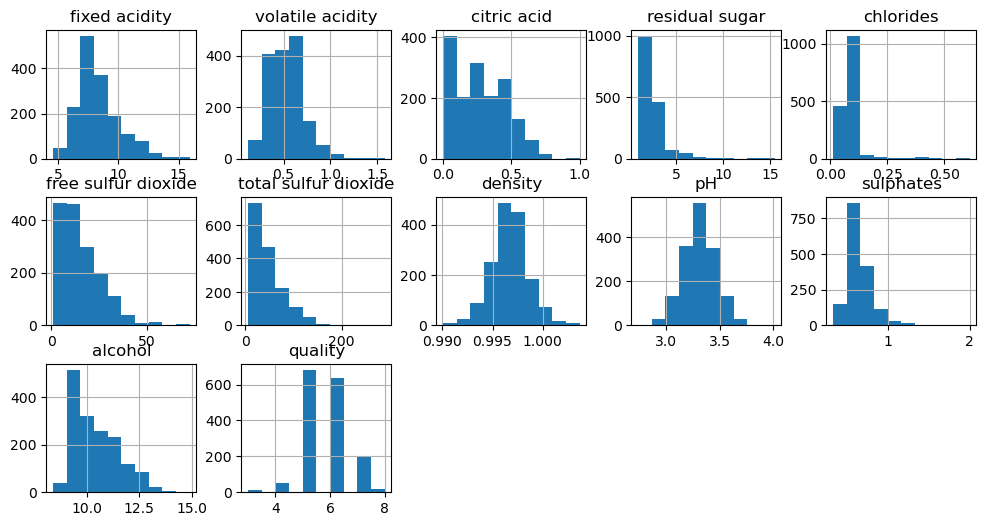

In [51]:
red_wine.hist(figsize=(12,6),layout=(3,5))

As it is seen above most of features are right-skewed. I transform the data to log to bring the destribution of data closeer to normal.

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>],
       [<AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

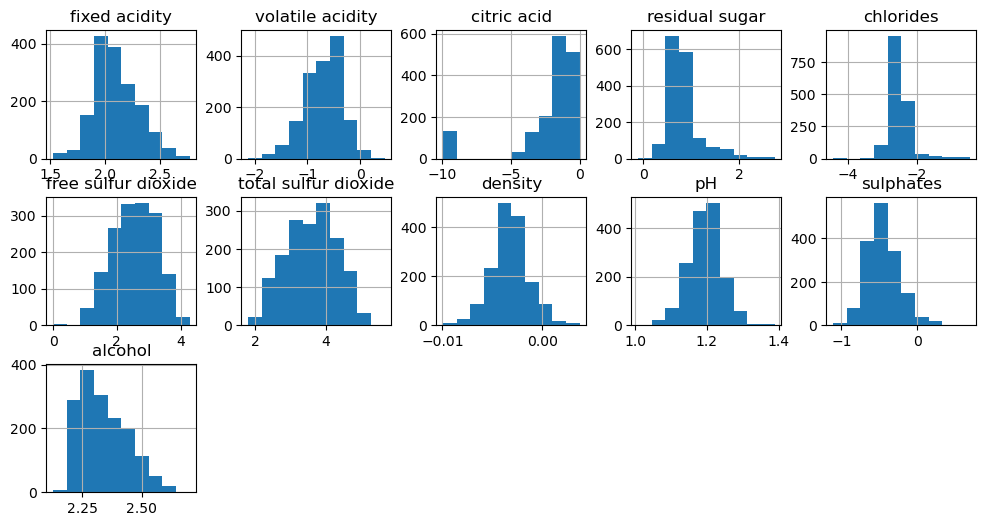

In [52]:
red_wine_t=np.log((red_wine[red_wine.columns[:-2]])+0.00005)
red_wine_t["wine_quality"]=red_wine["wine_quality"]
red_wine_t.hist(figsize=(12,6),layout=(3,5))

Plot pie chart to see how many red and white wines are there in the data set

([<matplotlib.patches.Wedge at 0x7f8f748b3250>,
 [Text(-0.08097155337995972, 1.0970157736073063, 'low'),
  Text(0.042133069811390665, -1.0991927967505377, 'medium'),
  Text(1.099312198304196, -0.03889332410062434, 'high')],
 [Text(-0.04416630184361439, 0.5983722401494397, '52.35'),
  Text(0.022981674442576722, -0.599559707318475, '46.53'),
  Text(0.5996248354386523, -0.021214540418522367, '1.13')])

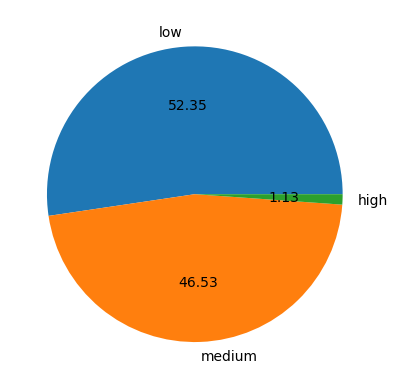

In [53]:
plt.pie(red_wine_t['wine_quality'].value_counts(), labels=red_wine_t['wine_quality'].unique(), autopct='%.2f')

Encoding

In [88]:
red_wine['wine_quality']=np.where(red_wine['wine_quality']== 'low', 0, red_wine['wine_quality'])
red_wine['wine_quality']=np.where(red_wine['wine_quality']== 'medium', 1, red_wine['wine_quality'])
red_wine['wine_quality']=np.where(red_wine['wine_quality']== 'high', 2, red_wine['wine_quality'])

In [87]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


Split data

In [89]:
from sklearn.model_selection import train_test_split
x, y=red_wine_t[red_wine_t.columns[:-1]], red_wine_t[red_wine_t.columns[-1]]
x=np.array(x)
y=np.array(y)
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.3,shuffle=True, random_state=42,stratify=y) 

Create pipelines to use in nested cross validation

In [58]:
from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier as Xgb
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier as LighGB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from skopt import BayesSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import matthews_corrcoef, f1_score, confusion_matrix, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold,cross_val_predict
from sklearn.model_selection import learning_curve

# initiakising classifiers

m1 = LogisticRegression(multi_class='multinomial',
                          solver='newton-cg',
                          random_state=1)
m2 = AdaBoostClassifier(random_state=1)
m3 = DecisionTreeClassifier(random_state=1)
m4 = LighGB(random_state=1)
m5 = RandomForestClassifier(random_state=1)

# Building the pipelines
pipe1 = Pipeline([('rfe', RFE(estimator=m1)),
                  ('m1', m1)])

pipe2 = Pipeline([('rfe', RFE(estimator=m2)),
                  ('m2', m2)])
                
pipe3=Pipeline([('rfe', RFE(estimator=m3)),
                  ('m3', m3)])

pipe4 = Pipeline([('rfe', RFE(estimator=m4)),
                  ('m4', m4)])
pipe5 = Pipeline([('rfe', RFE(estimator=m5)),
                  ('m5', m5)])



# Setting up the parameter grids
par1 = [{"rfe__n_features_to_select": [4,6,8,10], 'm1__penalty': ['l2'],
                'm1__C': np.power(10., np.arange(-4, 4))}]

par2 = [{"rfe__n_features_to_select": [4,6,8,10],"m2__n_estimators":[50,100,200,400,600], 
"m2__learning_rate": [1,3,5,12,16,20]}]

par3 = [{ "rfe__n_features_to_select": [4,6,8,10], "m3__criterion": ["gini", "entropy"],
"m3__splitter": ["best", "random"], "m3__max_depth": [None, 5,7,12,20]}]

par4 = [{"rfe__n_features_to_select": [4,5,6,7,8,9], 
"m4__max_depth": [-1,5,8], "m4__n_estimators": [100,300,500,30,700],
"m4__learning_rate": [1,2,4], "m4__subsample_for_bin":[500,1000,10000,200000]}]
par5 = [{"rfe__n_features_to_select": [4,6,8,10],  "m5__max_depth": [None,5,8,12,20],
              "m5__n_estimators" :[100,300,50,400,600],
              "m5__criterion": ["gini","entropy"],
              "m5__min_samples_split": [2,4,6],"m5__min_samples_leaf": [1,2,4,5]}]
 

Creat inner CV

In [59]:
pipe=[pipe1,pipe2,pipe3,pipe4,pipe5]
par_grid=[par1,par2,par3,par4,par5]
gcv_all=[]
f1 = make_scorer(f1_score , average='macro')

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for i in range(len(pipe)):
    gcv = BayesSearchCV(estimator=pipe[i],
                        search_spaces=par_grid[i],
                        scoring='f1_macro',
                        n_jobs=-1,
                        cv=inner_cv,
                        verbose=0,
                        refit=True)
    gcv_all.append(gcv)


Function for ploting learning curves

In [60]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Out CV + plotting learning curves 

In [61]:
import warnings

warnings.simplefilter('ignore')



final_scores = []
final_mean_score=[]
final_std_score=[]
confusion=[]
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
name=['LogisticRegression', 'AdaBoostClassifier','DecisionTreeClassifier'
,'LighGB', 'RandomForestClassifier'] 
count=0   
for gcv_out in gcv_all:  
    print(80*'_.')
    print('\n ', name[count] )  
    for train_idx, test_idx in outer_cv.split(X_train, y_train): 
        gcv_out.fit(X_train[train_idx], y_train[train_idx]) # run inner loop hyperparam tuning


        print('\n       Best f1 score in inner CV %.2f%%' % (gcv_out.best_score_ * 100))
        print('        Best parameters in inner CV:', gcv_out.best_params_)
        
    
        final_scores.append(gcv_out.best_estimator_.score(X_train[test_idx], y_train[test_idx]))
        print('       Best f1 score in outer CV %.2f%%' % (final_scores[-1]*100))
    
    print('\n    Outer Loop:')
    print('        f1 score %.2f%% +/- %.2f' % 
                (np.mean(final_scores) * 100, np.std(final_scores) * 100))
    print('        Best parameters in outer CV:', gcv_out.best_params_)
    final_mean_score.append(np.mean(final_scores) * 100)
    final_std_score.append(np.std(final_scores) * 100)
    confusion.append(confusion_matrix(y_test,gcv_out.predict(X_test)))
    pred=f1_score(y_test,gcv_out.predict(X_test), average='macro')
    print('  F1 score of prediction of the Best model is: %.2f%%' % (pred*100))

    plot_learning_curve(estimator = gcv_out.best_estimator_,title = "{} learning curve ".format(name[count]),
                    X = X_train, y = y_train, cv = outer_cv)
    plt.show()

    count+=1

 

_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

  LogisticRegression

       Best f1 score in inner CV 49.83%
        Best parameters in inner CV: OrderedDict([('m1__C', 10.0), ('m1__penalty', 'l2'), ('rfe__n_features_to_select', 8)])
       Best f1 score in outer CV 72.32%

       Best f1 score in inner CV 49.56%
        Best parameters in inner CV: OrderedDict([('m1__C', 10.0), ('m1__penalty', 'l2'), ('rfe__n_features_to_select', 8)])
       Best f1 score in outer CV 73.21%

       Best f1 score in inner CV 49.21%
        Best parameters in inner CV: OrderedDict([('m1__C', 1.0), ('m1__penalty', 'l2'), ('rfe__n_features_to_select', 10)])
       Best f1 score in outer CV 71.43%

       Best f1 score in inner CV 49.46%
        Best parameters in inner CV: OrderedDict([('m1__C', 10.0), ('m1__penalty', 'l2'), ('rfe__n_features_to_select', 6)])
       Best f1 score in outer CV 

TypeError: Cannot clone object 'array(['medium', 'medium', 'medium', 'medium', 'low', 'low', 'low', 'low',
       'medium', 'low', 'medium', 'low', 'low', 'medium', 'high',
       'medium', 'low', 'medium', 'medium', 'medium', 'low', 'low',
       'medium', 'medium', 'medium', 'low', 'low', 'low', 'medium',
       'medium', 'medium', 'low', 'low', 'medium', 'low', 'low', 'medium',
       'medium', 'medium', 'medium', 'low', 'medium', 'medium', 'medium',
       'medium', 'low', 'medium', 'medium', 'low', 'low', 'low', 'low',
       'medium', 'medium', 'low', 'medium', 'medium', 'medium', 'medium',
       'medium', 'low', 'medium', 'low', 'medium', 'medium', 'low', 'low',
       'medium', 'medium', 'high', 'low', 'medium', 'medium', 'medium',
       'medium', 'medium', 'low', 'low', 'low', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'low', 'low', 'medium',
       'medium', 'medium', 'medium', 'medium', 'low', 'medium', 'low',
       'medium', 'low', 'medium', 'low', 'low', 'medium', 'medium', 'low',
       'low', 'low', 'medium', 'medium', 'low', 'low', 'medium', 'medium',
       'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'low', 'medium', 'low', 'medium',
       'low', 'medium', 'medium', 'low', 'medium', 'medium', 'medium',
       'low', 'medium', 'medium', 'medium', 'medium', 'low', 'low', 'low',
       'medium', 'medium', 'medium', 'medium', 'medium', 'low', 'low',
       'medium', 'low', 'low', 'low', 'low', 'low', 'medium', 'medium',
       'medium', 'medium', 'low', 'low', 'medium', 'low', 'medium', 'low',
       'medium', 'low', 'medium', 'low', 'low', 'medium', 'medium',
       'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'low',
       'low', 'low', 'low', 'medium', 'low', 'medium', 'low', 'medium',
       'medium', 'medium', 'medium', 'low', 'low', 'medium', 'low', 'low',
       'medium', 'medium', 'low', 'low', 'medium', 'low', 'low', 'medium',
       'medium', 'medium', 'medium', 'medium', 'low', 'medium', 'low',
       'low', 'high', 'low', 'low', 'medium', 'medium', 'low', 'high',
       'low', 'medium', 'low', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'low', 'low',
       'medium', 'low', 'low', 'low', 'low', 'low', 'medium', 'medium',
       'low', 'medium', 'medium', 'low', 'low', 'low', 'medium', 'medium',
       'low', 'low', 'low', 'low', 'low', 'medium', 'medium', 'medium',
       'low', 'medium', 'medium', 'low', 'medium', 'medium', 'low', 'low',
       'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'low',
       'medium', 'medium', 'medium', 'low', 'low', 'medium', 'medium',
       'low', 'low', 'medium', 'low', 'medium', 'low', 'medium', 'low',
       'low', 'medium', 'low', 'low', 'low', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'low', 'low', 'medium', 'low',
       'medium', 'low', 'low', 'medium', 'medium', 'medium', 'medium',
       'medium', 'low', 'low', 'medium', 'low', 'low', 'low', 'low',
       'low', 'medium', 'low', 'low', 'medium', 'medium', 'medium', 'low',
       'medium', 'low', 'medium', 'medium', 'medium', 'low', 'low', 'low',
       'medium', 'medium', 'medium', 'medium', 'low', 'medium', 'low',
       'low', 'medium', 'low', 'low', 'medium', 'low', 'medium', 'medium',
       'medium', 'low', 'low', 'medium', 'low', 'medium', 'low', 'low',
       'medium', 'medium', 'low', 'low', 'low', 'low', 'medium', 'medium',
       'low', 'medium', 'low', 'low', 'low', 'medium', 'medium', 'low',
       'medium', 'low', 'low', 'high', 'high', 'medium', 'medium', 'low',
       'medium', 'low', 'low', 'low', 'low', 'medium', 'low', 'low',
       'low', 'medium', 'medium', 'low', 'medium', 'low', 'medium', 'low',
       'medium', 'medium', 'medium', 'low', 'medium', 'low', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium', 'low',
       'low', 'low', 'low', 'low', 'medium', 'medium', 'low', 'medium',
       'low', 'medium', 'medium', 'low', 'medium', 'low', 'low', 'low',
       'low', 'medium', 'low', 'medium', 'low', 'medium', 'low', 'medium',
       'low', 'low', 'low', 'medium', 'medium', 'medium', 'medium', 'low',
       'low', 'low', 'medium', 'medium', 'low', 'low', 'low', 'low',
       'medium', 'medium', 'medium', 'medium', 'medium', 'low', 'medium',
       'medium', 'medium', 'low', 'medium', 'low', 'medium', 'medium',
       'low', 'medium', 'medium', 'medium', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'medium', 'medium', 'low', 'low', 'medium',
       'medium'], dtype=object)' (type <class 'numpy.ndarray'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

Comparing scores of different models

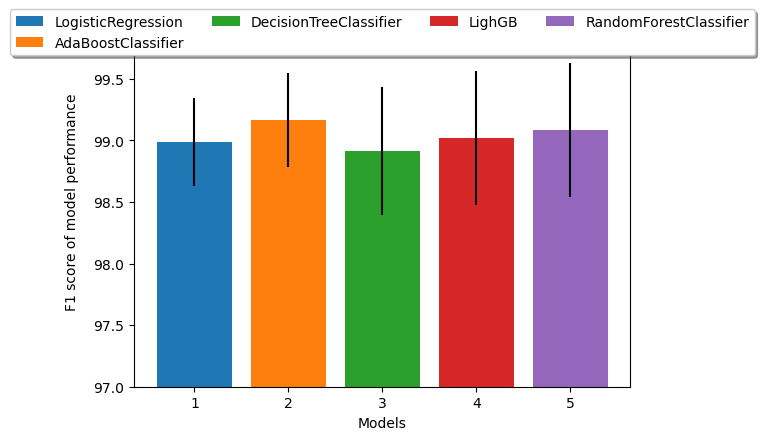

In [ ]:
for i in range(1,1+len(final_mean_score)):
    plt.bar(x=i, height=final_mean_score[i-1], yerr=final_std_score[i-1] )
    plt.ylim(97,100)
    plt.legend(labels= name, 
    loc='upper center', bbox_to_anchor=(0.5, 1.04), fancybox=True, shadow=True, ncol=4)

    plt.xlabel('Models')
    plt.ylabel('F1 score of model performance')


plt.show()

In [ ]:
pipe2 = Pipeline([('rfe', RFE(estimator=m2, n_features_to_select=10)),
                  ('m2', m2)])
gcv_model_bests=BayesSearchCV(pipe2, search_spaces=par2, scoring='f1', n_iter=30, n_jobs=-1,
cv=inner_cv, refit=True)

gcv_model_bests.fit(X_train,y_train)
print('Best model parameters of AdaBoostclassifier is: ', gcv_model_bests.best_params_)
print('Best score of  AdaBoostclassifier is: %.2f%%' %  (gcv_model_bests.best_score_*100))
print('confusion_matrix is: ',confusion_matrix(y_test, gcv_model_bests.predict(X_test)))
print('F1 score of prediction is : %.2f%%' % (100*f1_score(y_test, gcv_model_bests.predict(X_test),
average='macro')))



Best model parameters of AdaBoostclassifier is:  OrderedDict([('m2__learning_rate', 1), ('m2__n_estimators', 100), ('rfe__n_features_to_select', 10)])
Best score of  AdaBoostclassifier is: 98.70%
confusion_matrix is:  [[1465    5]
 [   3  477]]
F1 score of prediction is : 99.45%


In [ ]:
print('MCC is: %.2f%%' % (matthews_corrcoef(y_test, gcv_model_bests.
predict(X_test))*100))

MCC is: 98.90%


In [ ]:
from sklearn.metrics import balanced_accuracy_score
print("Balaced accuracy is : %.2f%%" %(balanced_accuracy_score(y_test, gcv_model_bests.
predict(X_test))*100))

Balaced accuracy is : 99.52%
